<a href="https://colab.research.google.com/github/Aryanchaturvedi075/COMP345/blob/main/A6_Language_Phylogeny_%26_Clustering/260976059_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NL2DS - Winter 2025**

# Assignment 6 -- Language Phylogeny, Clustering

Name: **Aryan Chaturvedi**

Student ID: **260976059**

## Instructions

This homework consists of 71 points, plus 4 points of extra credit.


There are two types of exercise:

* Some questions require writing code.  
  * Replace `# your code here` with your answer.  
  * The code block should run when all code above it in this file has also been run.  
  * If you skip some questions, it's your responsibility to make sure that all code blocks which you filled out still run.
* Some other questions require writing text.  
  * Replace "**put your answer here**" with your answer.

For coding questions:
* <font color='red'>**You may find code from the course CoLab notebooks -- and in particular the `Clustering` notebook (MyCourses->Content->Code Workbooks->Clustering) -- useful for this assignment.**</font>  
  * <font color='red'>**Do not reimplement any major functionality, such as calculating edit distance, linkage methods, clustering methods, etc.**</font>
* Following the contents of these CoLab notebooks, you should:
  * Use `sklearn` functionality as much as possible for machine learning tools. (For example, do not compute clusters using a different library.)
  * Use `pandas` functionalty as much as possible for basic data manipulation and analysis.
* Do not delete any code, unless it is marked as `# some code to get you started`.

Please make sure to follow directions carefully, including maximum lengths for text answers. Failure to follow directions may result in partial or no credit for the corresponding question.

**IMPORTANT: Make sure to correctly follow the instructions at the bottom on submitting your assignment, <font color='red'>INCLUDING MATCHING YOUR ANSWERS TO PDF PAGES WHEN SUBMITTING ON GRADESCOPE</font>. Failure to do so will result in <font color='red'>UP TO 10 POINTS BEING DEDUCTED</font>.**


# Section 1

In Sections 1-6 of the assignment we will look at some cross-linguistic word form data and use some of the tools we saw in class to build family trees of languages based on the sound forms of words---otherwise known as "optimal phylogenies."

We will use data from the following paper.


[Dellert, Johannes, Daneyko, T., Muench, A., Ladygina, A., Buch, A., Clarius, N., Grigorjew, I., Balabel, M., Boga, H. I., Baysarova, Z., Muehlenbernd, R., Wahle, J., and Jaeger, G. (2020). Northeuralex: A wide-coverage lexical database of northern eurasia. Language Resources & Evaluation, 54(273–301).](https://drive.google.com/file/d/1ptoMNctdJs99wPWfBUGbw4_X60NtKl9B/view?usp=sharing)

This data  can be found [here](http://northeuralex.org/) as well.

Copy the data to your drive folder from: [here](https://drive.google.com/file/d/1Mfa8XayBFJb0fY8wfinODw90yuRal8AD/view?usp=sharing), [here](https://drive.google.com/file/d/1AQqkscWKlq3quw-BWjB8xqSQzm7-uDtt/view?usp=sharing), and [here](https://drive.google.com/file/d/1R7ZLEzDW9QKUen3BjItPsySaUPCpu7xk/view?usp=sharing).

## Mounting Files

In [1]:
northeuralex_path = 'a6_data/northeuralex.csv'
languages_path = 'a6_data/northeuralex-languages.csv'
concepts_path = 'a6_data/northeuralex-concepts.csv'

try:
    from google.colab import drive
    drive.mount('/content/drive/')
    !ls "/content/drive/My Drive/NaturalLanguageProcessing/a6_data/"
    northeuralex_path = "/content/drive/My Drive/NaturalLanguageProcessing/a6_data/northeuralex.csv"
    languages_path = "/content/drive/My Drive/NaturalLanguageProcessing/a6_data/northeuralex-languages.csv"
    concepts_path = "/content/drive/My Drive/NaturalLanguageProcessing/a6_data/northeuralex-concepts.csv"
except ModuleNotFoundError:
    print("Running in local environment")

Running in local environment


## Question 1 (3 points)

Read the paper and/or Northeuralex's website as much as necessary to answer this question.

**Question:** What is the Northeuralex dataset? Give a brief overview, including:
* What kind of data is it?
* What is the purpose of this data (what sorts of scientific questions or practical applications will it be used to address)?
* How was it constructed?

 Your answer should not refer to low-level details, such as file names or what columns are present in different files.  Just give an overview of no more than one paragraph that gives the gist for someone unfamiliar with the dataset.



**A1: NorthEuraLex is a database containing words for over 1,000 common concepts in 107 languages spoken across Northern Eurasia. It was created to help researchers study how languages relate to each other and how they've changed over time by comparing similar words across different language families. The data was gathered from existing resources and standardized to make it useful for computer-based research on language history and relationships.**

## Question 2 (3 points)

Now, let's read in the wordforms in this dataset.

In [2]:
import pandas as pd
wordforms=pd.read_csv(northeuralex_path)
display(wordforms)

,Language_ID,Glottocode,Concept_ID,Word_Form,rawIPA,IPA,ASJP,List,Dolgo,Next_Step
0,fin,finn1318,Auge::N,silmä,silmæ,s i l m æ,silmE,SILME,SVRMV,validate
1,fin,finn1318,Ohr::N,korva,kɔrʋɑ,k ɔ r ʋ ɑ,korwa,KURWA,KVRWV,validate
2,fin,finn1318,Nase::N,nenä,nɛnæ,n ɛ n æ,nEnE,NENE,NVNV,validate
3,fin,finn1318,Mund::N,suu,suː,s u u,su,SY,SV,validate
4,fin,finn1318,Zahn::N,hammas,hɑmːɑs,h ɑ m m ɑ s,hamas,HAMAS,HVMVS,validate
...,...,...,...,...,...,...,...,...,...,...
121608,cmn,mand1415,verkaufen::V,卖,mâɪ̯,m a ɪ,mai,MAI,MV,validate
121609,cmn,mand1415,bezahlen::V,付钱,fû t͡ɕʰjɛ̌n,f u _ t͡ɕ ʰ j ɛ n,fuCyEn,BY_CJE2N,PV_KJV1N,validate
121610,cmn,mand1415,zahlen::V,支付,t͡ʂɨ˦fû,t ʂ ɨ f u,C3fu,CI1BY,KV1PV,validate
121611,cmn,mand1415,beherrschen::V,统治,tʰʊ̂̌ŋt͡ʂɨ̂,tʰ ʊ ŋ t ʂ ɨ,tuNC3,TY2NCI,TV1NKV,validate


**Question:** Describe the meaning of the `Language_ID`, `Concept_ID`, `rawIPA` and `IPA` columns of the data.  Why are there separate `rawIPA` and `IPA` columns?

**A2:**
- **`Language_ID`: Unique identifier for each of the 107 languages included in the database**
- **`Concept_ID`: Identifier for each of the 1,016 concepts (common words or meanings) covered across languages**
- **`rawIPA`: The initial automatic IPA transcription generated directly from standard orthographies**
- **`IPA`: The refined or corrected version of the phonetic transcription**

**The separate `rawIPA` and `IPA` columns exist because the `rawIPA` contain inaccuracies that require improvement over time, with the `IPA` column representing the more polished version after corrections have been applied.**


## Question 3 (2 points)

Now let's read in some metadata about the languages.

In [3]:
languages=pd.read_csv(languages_path)
display(languages)

,name,glotto_code,iso_code,family,subfamily,latitude,longitude
0,Finnish,finn1318,fin,Uralic,Finnic,61.0000,24.4500
1,North Karelian,kare1335,krl,Uralic,Finnic,65.1691,30.8655
2,Olonets Karelian,livv1243,olo,Uralic,Finnic,61.0000,33.0000
3,Veps,veps1250,vep,Uralic,Finnic,60.3353,34.7865
4,Estonian,esto1258,ekk,Uralic,Finnic,59.2500,24.7500
...,...,...,...,...,...,...,...
102,Dargwa,darg1241,dar,Nakh-Daghestanian,Daghestanian,42.4257,47.4388
103,Chechen,chec1245,che,Nakh-Daghestanian,Nakh,43.5000,45.5000
104,Standard Arabic,stan1318,arb,Afro-Asiatic,Semitic,27.9625,43.8525
105,Modern Hebrew,hebr1245,heb,Afro-Asiatic,Semitic,31.1056,35.0179


**Question:** Describe the meaning of the `family`, `iso_code`, and `subfamily` columns of the data.  

**A3:**
- **`family`: Major language classification group**

- **`iso_code`: Standard three-letter international language identifier code**

- **`subfamily`: Sub-classification branch within the main language family**

## Question 4 (2 points)

Now let's read in some further data about the concepts.

In [4]:
concepts=pd.read_csv(concepts_path)
display(concepts)

,number,position_in_ranking,ranking_value,id_nelex,gloss_en,gloss_ru,annotation_en,annotation_en.1,annotation_ru,concepticon,concepticon_id,concepticon_proposed,comments
0,1,44,"-2,539237",Auge::N,eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
1,2,34,"-2,649194",Ohr::N,ear,ухо,[[Anatomie]],[[anatomy]],[[анатомия]],EAR,1247,EAR,NaN
2,3,149,"-1,995463",Nase::N,nose,нос,[[Anatomie]],[[anatomy]],[[анатомия]],NOSE,1221,NOSE,NaN
3,4,25,"-2,762589",Mund::N,mouth,рот,[[Anatomie]],[[anatomy]],[[анатомия]],MOUTH,674,MOUTH,NaN
4,5,31,"-2,670705",Zahn::N,tooth,зуб,[BSP:menschlicher Schneidezahn],[EX:human incisor],[НАПР:человека],TOOTH,1380,TOOTH,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,1012,140,"-2,029052",verkaufen::V,sell,продать,[BSP:Ware],[EX:goods],[НАПР:товар],SELL,1571,SELL,NaN
1012,1013,198,"-1,822012",bezahlen::V,pay for,заплатить,[BSP:Ware],[EX:goods],[НАПР:за товар],NaN,0,PAY_FOR,NaN
1013,1014,235,"-1,715766",zahlen::V,pay,платить,[BSP:im Restaurant],[EX:in a restaurant],[НАПР:в ресторане],PAY,718,PAY,NaN
1014,1015,899,"0,118183",beherrschen::V,rule,владеть,[BSP:Land],[EX:country],[НАПР:страной],RULE,1846,RULE,NaN


**Question:** Describe the meaning of the `id_nelex`, `gloss_en`, and `position_in_ranking` columns of the data.

**A4:**
- **`id_nelex`: Unique concept identifier in German with grammatical category tag**

- **`gloss_en`: English translation or gloss of the concept**

- **`position_in_ranking`: Numerical position of the concept in a conceptual ranking system**

# Section 2

## Question 5 (2 points)

It will be useful to merge all of the meta-information into the main wordforms dataframe.

In [5]:
# Question-a: rename the appropriate columns in the languages and concepts dataframes to make this merge possible.
languages = languages.rename(columns={'iso_code': 'Language_ID',
                                     'glotto_code': 'Glottocode'})

concepts = concepts.rename(columns={'id_nelex': 'Concept_ID'})

# Question-b: Use the pd.merge function to merge the three dataframes into one.
merged_df = pd.merge(wordforms, languages, on=['Language_ID', 'Glottocode'], how='left')
final_df = pd.merge(merged_df, concepts, on='Concept_ID', how='left')
wordforms = final_df

display(wordforms)

,Language_ID,Glottocode,Concept_ID,Word_Form,rawIPA,IPA,ASJP,List,Dolgo,Next_Step,...,ranking_value,gloss_en,gloss_ru,annotation_en,annotation_en.1,annotation_ru,concepticon,concepticon_id,concepticon_proposed,comments
0,fin,finn1318,Auge::N,silmä,silmæ,s i l m æ,silmE,SILME,SVRMV,validate,...,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
1,fin,finn1318,Ohr::N,korva,kɔrʋɑ,k ɔ r ʋ ɑ,korwa,KURWA,KVRWV,validate,...,"-2,649194",ear,ухо,[[Anatomie]],[[anatomy]],[[анатомия]],EAR,1247,EAR,NaN
2,fin,finn1318,Nase::N,nenä,nɛnæ,n ɛ n æ,nEnE,NENE,NVNV,validate,...,"-1,995463",nose,нос,[[Anatomie]],[[anatomy]],[[анатомия]],NOSE,1221,NOSE,NaN
3,fin,finn1318,Mund::N,suu,suː,s u u,su,SY,SV,validate,...,"-2,762589",mouth,рот,[[Anatomie]],[[anatomy]],[[анатомия]],MOUTH,674,MOUTH,NaN
4,fin,finn1318,Zahn::N,hammas,hɑmːɑs,h ɑ m m ɑ s,hamas,HAMAS,HVMVS,validate,...,"-2,670705",tooth,зуб,[BSP:menschlicher Schneidezahn],[EX:human incisor],[НАПР:человека],TOOTH,1380,TOOTH,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121608,cmn,mand1415,verkaufen::V,卖,mâɪ̯,m a ɪ,mai,MAI,MV,validate,...,"-2,029052",sell,продать,[BSP:Ware],[EX:goods],[НАПР:товар],SELL,1571,SELL,NaN
121609,cmn,mand1415,bezahlen::V,付钱,fû t͡ɕʰjɛ̌n,f u _ t͡ɕ ʰ j ɛ n,fuCyEn,BY_CJE2N,PV_KJV1N,validate,...,"-1,822012",pay for,заплатить,[BSP:Ware],[EX:goods],[НАПР:за товар],NaN,0,PAY_FOR,NaN
121610,cmn,mand1415,zahlen::V,支付,t͡ʂɨ˦fû,t ʂ ɨ f u,C3fu,CI1BY,KV1PV,validate,...,"-1,715766",pay,платить,[BSP:im Restaurant],[EX:in a restaurant],[НАПР:в ресторане],PAY,718,PAY,NaN
121611,cmn,mand1415,beherrschen::V,统治,tʰʊ̂̌ŋt͡ʂɨ̂,tʰ ʊ ŋ t ʂ ɨ,tuNC3,TY2NCI,TV1NKV,validate,...,"0,118183",rule,владеть,[BSP:Land],[EX:country],[НАПР:страной],RULE,1846,RULE,NaN


## Question 6 (2 points)

In this problem set, we will make use of the `lingpy` package of tools for historical linguistics. You can find more information on this [here](https://lingpy.org/index.html). We'll start by installing the package.

In order to make our computations below more manageable, we will focus on the **Indo-European** languages which you can read more about [here](https://en.wikipedia.org/wiki/Indo-European_languages). We will also focus just on the top 20 concepts as determined by their rank. Please do not make any changes to the `wordforms` dataframe, and instead, create a new dataframe called `wordforms_20`.

In [6]:
# Question-a: Filter out the non-Indo-European languages from the dataframes
indo_european_df = wordforms[wordforms['family'] == 'Indo-European']

# Question-b: Filter the concepts to include those less than or equal to rank 20 in the dataframe.
wordforms_20 = indo_european_df[indo_european_df['position_in_ranking'] <= 20]

display(wordforms_20)

,Language_ID,Glottocode,Concept_ID,Word_Form,rawIPA,IPA,ASJP,List,Dolgo,Next_Step,...,ranking_value,gloss_en,gloss_ru,annotation_en,annotation_en.1,annotation_ru,concepticon,concepticon_id,concepticon_proposed,comments
30428,ben,beng1280,Wasser::N,জল,d͡ʒɔl,d͡ʒ ɔ l,jol,CUL,KVR,validate,...,"-2,92383",water,вода,[kaltes Wasser],[cold water],[холодная вода],WATER,948,WATER,NaN
30571,ben,beng1280,Sohn::N,ছেলে,t͡ʃʰele,t͡ʃ ʰ e l e,Cele,CELE,KVRV,validate,...,"-2,902475",son,сын,[],[],[],SON,1620,SON,NaN
30823,ben,beng1280,Tag::N,দিন,d̪in,d i n,din,TIN,TVN,validate,...,"-3,008012",day,день,[],[],[],DAY_(NOT_NIGHT),1225,DAY_(NOT_NIGHT),NaN
30982,ben,beng1280,hier::ADV,এখানে,ekʰane,e kʰ a n e,ekane,EKANE,VKVNV,validate,...,"-2,945985",here,здесь,[],[],[],HERE,136,HERE,NaN
30985,ben,beng1280,dort::ADV,ওখানে,okʰane,o kʰ a n e,okane,UKANE,VKVNV,validate,...,"-2,964168",there,там,[],[],[],THERE,1937,THERE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73176,ron,roma1327,zwei::NUM,doi,doj,d o j,doy,TUJ,TVJ,validate,...,"-3,252278",two,два,[],[],[],TWO,1498,TWO,NaN
73184,ron,roma1327,zehn::NUM,zece,zet͡ʃe,z e t͡ʃ e,zeCe,SECE,SVKV,validate,...,"-3,174243",ten,десять,[],[],[],TEN,1515,TEN,NaN
73320,ron,roma1327,kommen::V,veni,venʲ,v e nʲ,ven,BEN,WVN,validate,...,"-2,955592",come,прийти,[sich hierher begeben],[move here],[двигаться сюда],COME,1446,COME,NaN
73456,ron,roma1327,nehmen::V,lua,lwa,l w a,lwa,LWA,RWV,validate,...,"-3,037664",take,взять,[],[],[],TAKE,1749,TAKE,NaN


# Section 3

In [7]:
try:
    import lingpy as lp
    print("LingPy is already installed.")
except ImportError:
    !pip install lingpy
    import lingpy as lp

LingPy is already installed.


## Question 7 (6 points)

Our goal is to use agglomerative clustering to try to reconstruct the tree for the Indo-European languages. You can find a reference tree (for families) [here](https://en.wikipedia.org/wiki/Indo-European_languages#/media/File:IndoEuropeanLanguageFamilyRelationsChart.jpg).

In order to do this, we will need to construct a  matrix of similarities between the languages, called a confusion matrix.

We will compute the (normalized) levenshtein distance between the strings for each concept for each pair of languages. For instance, we will compute the normalized levenshtein distance between the words for Wasser::N (water in English) for German and English and then similarily for all 19 other concepts. If there are multiple words for the same concept, take the average across all pair possibilities. We will then average these values (i.e., average across all concepts) to find the similarity between German and English. We will do this for all pairs of languages to create a list of lists representing the confusion matrix.

Note that running your code will take a few minutes.

**Hint**: Make use of the `lp.align.pairwise.edit_dist` function from lingpy.

In [8]:
import numpy as np

def get_confusion_matrix_and_language_list(wordforms_i):
    # Initialize confusion matrix
    languages = wordforms_i['Language_ID'].unique()
    num_lang = len(languages)
    confusion_matrix = [[0 for j in range(len(languages))] for i in range(len(languages))]

    for i, language1 in enumerate(languages):
        for j, language2 in enumerate(languages):
            if i <= j: # 0 for the same languages
                continue

            lang1_data = wordforms_i[wordforms_i['Language_ID'] == language1]
            lang2_data = wordforms_i[wordforms_i['Language_ID'] == language2]
            distances = []  # Store distances for all concepts

            for concept in lang1_data['Concept_ID'].unique():
                lang1_words = lang1_data[lang1_data['Concept_ID'] == concept]['IPA'].dropna().tolist()
                lang2_words = lang2_data[lang2_data['Concept_ID'] == concept]['IPA'].dropna().tolist()

                # Ensure both languages have words for the concept
                if not lang1_words or not lang2_words:
                    continue

                # Compute pairwise distances between all words for the concept
                pair_distances = [
                    lp.align.pairwise.edit_dist(word1, word2, normalized=True)
                    for word1 in lang1_words
                    for word2 in lang2_words
                ]
                distances.append(np.mean(pair_distances))

            # Average across all concepts to compute similarity between the two languages
            confusion_matrix[i][j] = confusion_matrix[j][i] = np.mean(distances) if distances else 0

    return confusion_matrix, list(languages)

In [9]:
# Question: fill the confusion matrix on the "IPA" fields for each language.
confusion, language_list = get_confusion_matrix_and_language_list(wordforms_20)

**After running this cell, clear the *output* of the above cell (by clicking on the cross at top left of the output part) so that it doesn't clutter the pdf.**

In [10]:
# for previewing the confusion matrix
confusion_df = pd.DataFrame(confusion)
pd.options.display.float_format = "{:.2f}".format
# display(confusion_df)

## Question 8 (2 points)

Now that we have computed a matrix of similarities, we can use clustering algorithms to try to build phylogenetic trees representing the languages historical relationships. First, let's use the `lp.algorithm.clustering.flat_cluster` function from `lingpy` to derive a flat clustering of languages.


In [11]:
cluster = lp.algorithm.clustering.flat_cluster('upgma', 0.6, confusion, language_list)
print(cluster)

{0: ['ben', 'hin'], 2: ['pbu'], 3: ['pes', 'kmr'], 5: ['oss'], 6: ['hye'], 7: ['ell'], 8: ['sqi'], 10: ['hrv', 'slv', 'bul', 'slk', 'pol', 'ces', 'bel', 'rus', 'ukr', 'lit', 'lav'], 20: ['isl', 'nor', 'swe', 'dan', 'deu', 'nld', 'eng'], 27: ['gle'], 28: ['cym', 'bre'], 30: ['lat'], 31: ['fra'], 32: ['cat', 'spa', 'por', 'ita', 'ron']}


**Question:** Do you recognize any of the clusters of languages? Are there any noteworthy errors in this clustering?  (You may first need to learn a bit about Indo-European languages.)

**A8: The clustering captures some accurate groupings, such as Indo-Aryan languages ('ben', 'hin'), Germanic languages ('isl', 'nor', 'swe', etc.), and Romance languages ('cat', 'spa', 'por', etc.). However, errors include splitting Celtic languages into two clusters, isolating French from other Romance languages, and merging Baltic and Slavic languages instead of distinguishing them.**


# Section 4

## Question 9 (2 points)

Now we will build our own dendrogram using the clustering algorithms available in [`scipy`](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html). You can read in particular about the [`linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) function and the [`dendrogram`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) function.

C:\Users\chatu\AppData\Local\Temp\ipykernel_30536\2907674547.py:6: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(confusion, method='average')


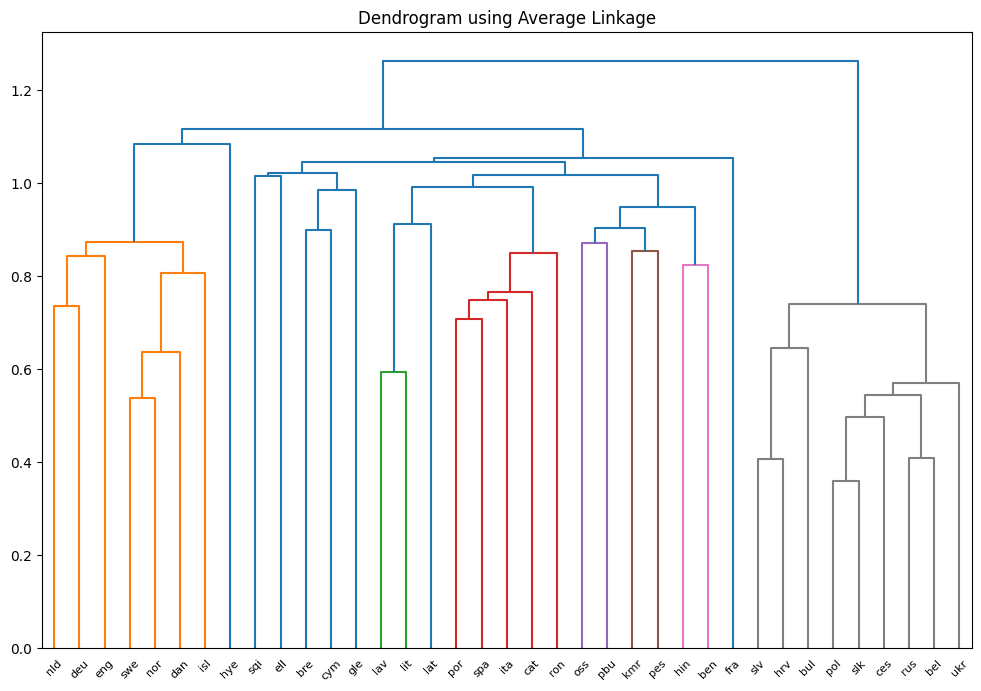

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import v_measure_score
import matplotlib.pyplot as plt

# Question: use the linkage function with the average linkage method to compute the clustering.
linked = linkage(confusion, method='average')

# Plot the results using dendrogram
def llf(id): return language_list[id]

plt.figure(figsize=(12, 8))
dendrogram(linked,
           p=100,
           truncate_mode="level",
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           leaf_label_func=llf)
plt.title("Dendrogram using Average Linkage")
plt.show()

## Question 10 (2 points)

**Question:** Do you recognize any of the clusters of languages at any of the levels? Are there any noteworthy errors in this clustering?

**A10: The dendrogram successfully identifies major language families including the Romance cluster (spa, por, ita, cat, ron), Slavic cluster (rus, ukr, bul, pol, ces), Germanic cluster (eng, deu, nor, swe), and Indo-Iranian languages, but contains errors including misplacement of French (fra) separate from other Romance languages, mixing of Baltic languages (lit, lav) with Slavic languages rather than as their own branch, and some Celtic languages being separated from their family.**

# Section 5

## Question 11 (4 points)

(2 points for code, 2 points for text answer)

**Question-a:** Try two of the other linkage methods.

C:\Users\chatu\AppData\Local\Temp\ipykernel_30536\3082273672.py:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked_single = linkage(confusion, method='weighted')


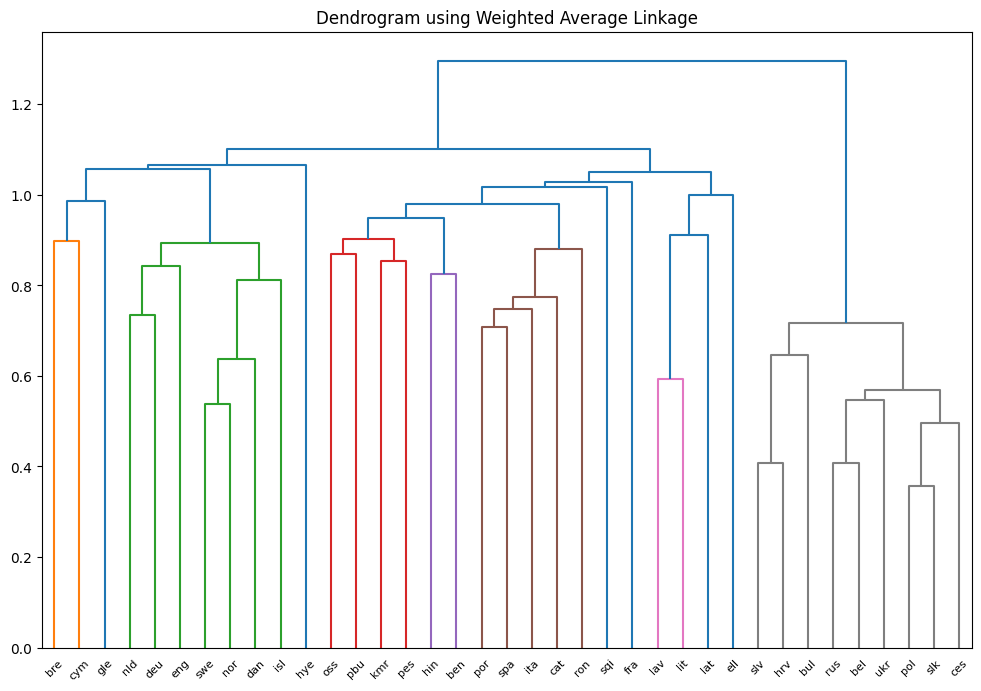

In [13]:
# Question-a: other method 1
# Method 1: Weighted Average Linkage (weighted mean distance between clusters)
linked_single = linkage(confusion, method='weighted')

plt.figure(figsize=(12, 8))
dendrogram(linked_single,
           p=100,
           truncate_mode="level",
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           leaf_label_func=llf)
plt.title("Dendrogram using Weighted Average Linkage")
plt.show()

C:\Users\chatu\AppData\Local\Temp\ipykernel_30536\2696461210.py:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked_complete = linkage(confusion, method='complete')


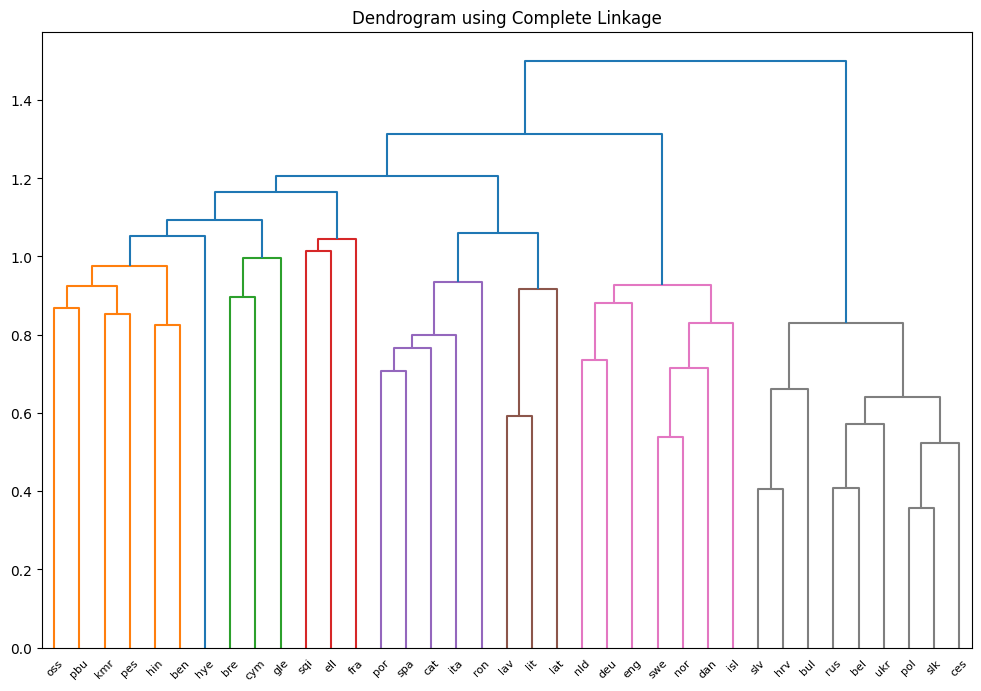

In [14]:
# Question-a: other method 2
# Method 2: Complete Linkage (maximizes the distance between clusters)
linked_complete = linkage(confusion, method='complete')

plt.figure(figsize=(12, 8))
dendrogram(linked_complete,
           p=100,
           truncate_mode="level",
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           leaf_label_func=llf)
plt.title("Dendrogram using Complete Linkage")
plt.show()

**Question-b:** Describe how they change the results.

**A11: The weighted average linkage method produces results similar to average linkage but slightly alters cluster distances, particularly merging Slavic and Baltic languages more closely. The complete linkage method creates tighter clusters with larger inter-cluster distances, isolating languages like French ('fra') and Armenian ('hye') earlier and grouping Slavic languages more compactly.**

## Question 12 (4 points)

(2 points for code, 2 points for text answer)

**Question-a:** Try increasing the number of concepts we use to compute our confusion matrix to be **50**.

**Note:** Include all the code in separate cells like below. Make sure to define new variables so the previous variables (e.g., `wordforms_20`, `language_list`, `confusion` matrix, etc.) are not re-assigned.

In [15]:
# Question-a
wordforms_50 = indo_european_df[indo_european_df['position_in_ranking'] <= 50]

In [16]:
confusion_50, language_list_50 = get_confusion_matrix_and_language_list(wordforms_50)

In [17]:
cluster_50 = lp.algorithm.clustering.flat_cluster('upgma', 0.6, confusion_50, language_list_50)
print(cluster_50)

{0: ['ben', 'hin'], 2: ['pbu'], 3: ['pes', 'kmr'], 5: ['oss'], 6: ['hye'], 7: ['ell'], 8: ['sqi'], 10: ['hrv', 'slv', 'bul', 'slk', 'pol', 'ces', 'ukr', 'bel', 'rus'], 18: ['lit', 'lav', 'lat'], 20: ['isl', 'nor', 'swe', 'dan', 'deu', 'nld', 'eng'], 27: ['gle'], 28: ['cym', 'bre'], 31: ['fra'], 32: ['cat', 'spa', 'por', 'ita', 'ron']}


**Question-b:** Does increasing from top 20 concepts to top 50 change the results?

**A12: Yes, increasing from top 20 to top 50 concepts produces a significant change: the Baltic languages (Lithuanian 'lit', Latvian 'lav') are now separated from Slavic languages and form their own cluster with Latin ('lat'). This change better reflects the traditional Indo-European language family structure by distinguishing Baltic from Slavic languages.**

# Section 6

Let's evaluate the quality of the clustering from Question 8, relative to one of the class labels we have: `subfamily`. In other words: the clustering we implement in Question 8 gives us some clusters of languages, that you may recognize as relating to language families/subfamilies. Given the ground truth we have in the `subfamily` labels, how well does our clustering do?

## Question 13 (6 points)

(4 points for code, 2 points for text answer)

Write code to compute the V measure score for this clustering relative to `subfamily`, then print them. Note that when using the `v_measure_score` function, you DO NOT need to standardize and align the cluster names/labels. (For example, it's okay if your 'true' cluster labels are encoded as strings, and your 'predicted' cluster labels are encoded as integers.)

In [18]:
# Question-a
# save the V measure score as v_measure_subfamily
# Hint: computing subfamily may require more than a couple lines of code.

from sklearn.metrics import v_measure_score

true_labels = []
predicted_labels = []

# Create a mapping of language to subfamily
language_subfamily_map = {}
for lang_id in language_list:
    subfamily = wordforms_20[wordforms_20['Language_ID'] == lang_id]['subfamily'].iloc[0]
    language_subfamily_map[lang_id] = subfamily

# Extract predicted labels from the clustering
language_cluster_map = {}
for cluster_id, languages in cluster.items():
    for lang in languages:
        language_cluster_map[lang] = cluster_id

# Create arrays of true and predicted labels in the same order
for lang in language_list:
    true_labels.append(language_subfamily_map[lang])
    predicted_labels.append(language_cluster_map[lang])

v_measure_subfamily = v_measure_score(true_labels, predicted_labels)
print(v_measure_subfamily)

0.9229765907369315


**Question-b:** Intrepret the `v_measure_subfamily` you printed above. Was your clustering in Question 8 good enough?

**A13: With a `V-measure score` of 0.923, the clustering does a good job at successfully capturing over 92% of the subfamily structure in Indo-European languages, which is remarkably good for an unsupervised approach based solely on phonetic distances.**

# Section 7

In the remainder of this assignment, you'll use vowel duration and formant data like **the Classification and Clustering notebooks (MyCourses -> Content -> Code Workbooks)**---except from a mystery language, where the labels are unknown.  

Our data file, `mystery_vowels.csv`, gives duration, F1, F2, F3, and F4 values for vowel measurements from this language.  Note the lack of `speaker` and `vowel` columns: you don't know how many speakers this data came from and how many vowel categories there are.

Your goal is to determine $k$, the number of vowel categories.

Copy the data to your Drive folder from [here](https://drive.google.com/file/d/1lL62Su-GGSNZTzvp-7MgWLmZQXVBvPhm/view?usp=sharing).

## Mounting Files

In [19]:
mystery_vowels_path = 'a6_data/mystery_vowels.csv'

try:
    from google.colab import drive
    mystery_vowels_path = "/content/drive/My Drive/NaturalLanguageProcessing/a6_data/mystery_vowels.csv"
except ModuleNotFoundError:
    print("Running in local environment")

Running in local environment


Load the data:

In [20]:
import pandas as pd
mystery_vowels = pd.read_csv(mystery_vowels_path)
display(mystery_vowels)


,dur,F1,F2,F3,F4
0,72.84,560.79,1308.05,2174.79,3430.16
1,103.26,637.36,1313.09,2145.32,3398.57
2,154.13,514.65,1631.22,2394.65,3384.17
3,153.19,315.86,2042.19,2614.71,3398.86
4,99.73,539.53,1031.47,2047.00,3221.47
...,...,...,...,...,...
115,91.67,621.23,1373.12,2472.69,3409.84
116,80.57,527.05,1755.57,2605.10,3500.12
117,94.39,374.05,2029.31,2685.48,3479.08
118,97.61,518.84,1071.13,2600.19,3356.81


We will call this data `X`, just for consistency with our other CoLab notebooks.

In [21]:
X = mystery_vowels

Plot the data:  

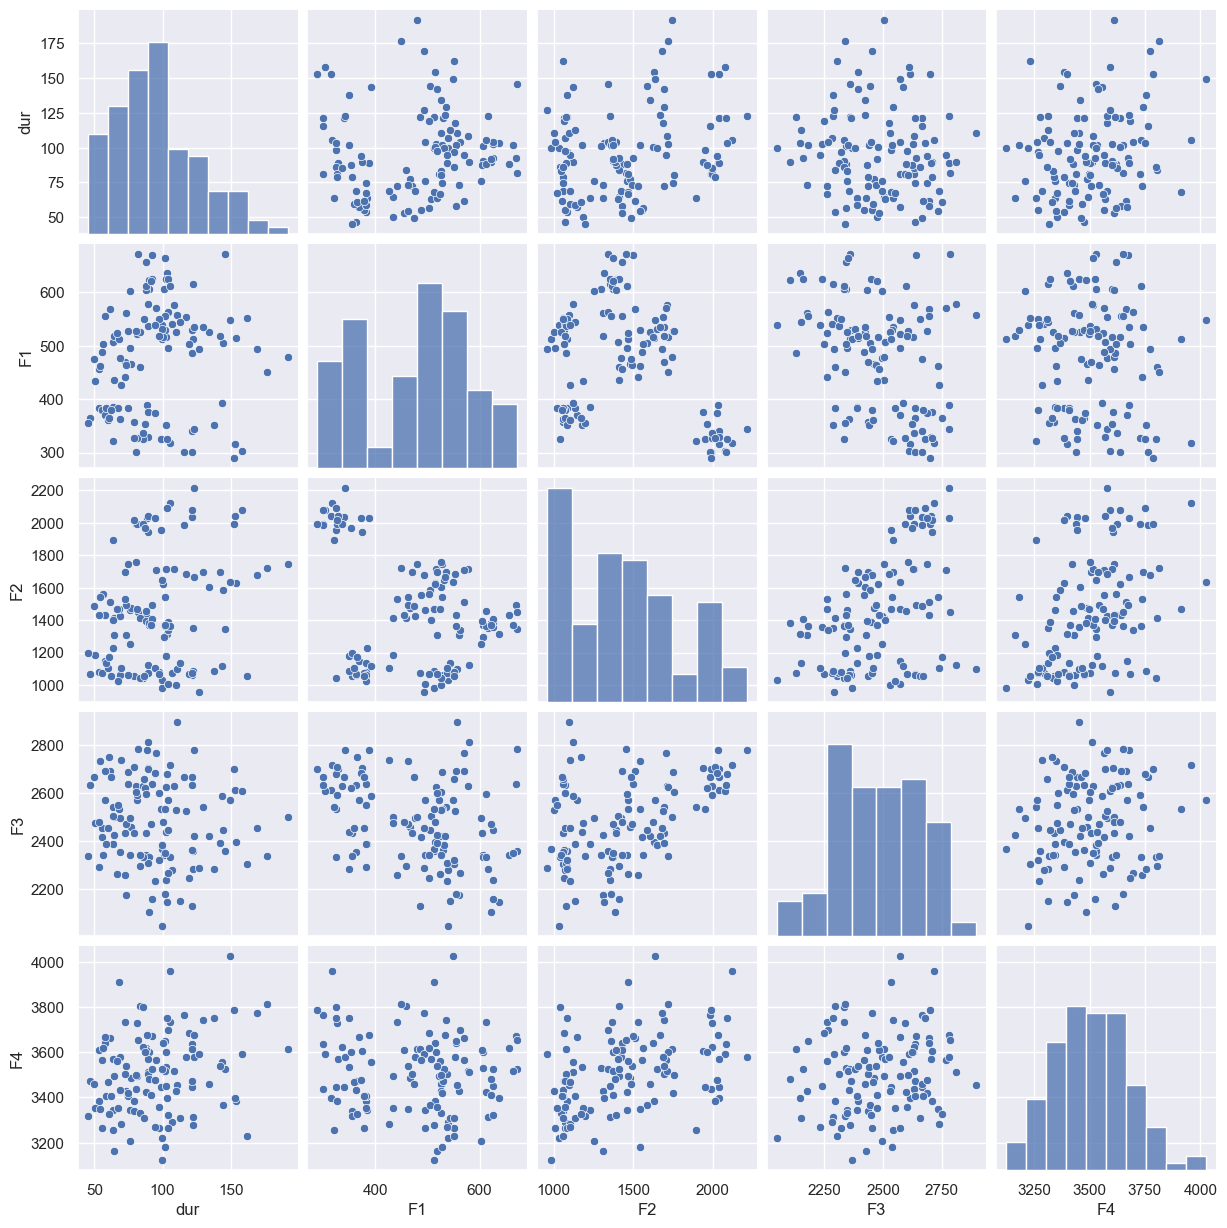

In [22]:
import seaborn as sns; sns.set()
sns.pairplot(X, vars=['dur', 'F1', 'F2','F3','F4'])

Note that we don't color by `vowel` label, unlike the English vowels data, because we don't know what vowel each token correpsonds to.

## Question 14 (2 points)

Choose two variables (= a diagonal panel) or pairs of variables (= an off-diagonal panel) where the data looks _most_ separated into clusters.  What two panels did you choose, and what values of $k$ do you guess?

**A14:**
- **F1 vs F2 panel (second row, third column) looks most separted with a approximate $k$-value of 5-6** **bold text**
- **F2 vs F3 panel (third row, fourth column) displays about 5-7 clusters that are reasonably well-separated, with visible groupings in different regions of the formant space.**

## Question 15 (2 points)

When working with the English vowel data, we got the best performance by normalizing each column of `X` in a specific way.  Explain why it isn't possible to perform this normalization for our current dataset.

**A15: In the English vowel dataset, normalization was likely performed with respect to speaker identity, but our mystery dataset lacks speaker labels, making it impossible to normalize formant values relative to each speaker's physiological characteristics.**

# Section 8

We will try two methods for determining the number of categories: $k$-means and GMM clustering.   

**Notes for the remainder of this assignment**:

* Every time you run $k$-means or GMM clustering, you should use the arguments `n_init = 10` and `random_state = 42`.  
  * These values make sure that your clustering finds the global minimum, and that we'll get the same "random" value for grading purposes.

* Any method you use should not divide the data (i.e. into train/test or "folds" for cross-validation): we are training and testing on the same data.

  * This makes the code maximally parallel to the Classification CoLab notebook.

## Question 16 (2 points)

As a warm-up, let's do $k$-means clustering with the value of $k$ that seems most likely to you from Q14.  

Define a variable  `k_q14`which is set to your guess for $k$.

Then:

* Perform $k$-means clustering using this $k$, and save the result as `kmeans_q16`.
* Make a vector `y_kmeans_q16` of the category labels predicted by this clustering.

In [23]:
from sklearn.cluster import KMeans

# Question
# Make sure to use the arguments `n_init = 10` and `random_state = 42` for clustering

k_q14 = 6

# Perform k-means clustering
kmeans_q16 = KMeans(n_clusters=k_q14, n_init=10, random_state=42)
kmeans_q16.fit(X)

y_kmeans_q16 = kmeans_q16.labels_
print(y_kmeans_q16)

[5 5 2 0 3 3 2 3 2 0 3 3 2 5 2 0 3 3 2 5 2 0 3 3 2 5 4 0 3 1 2 5 4 0 3 3 4
 4 4 0 1 1 4 4 4 0 1 3 2 5 4 0 3 1 3 3 2 0 1 1 5 5 4 0 5 5 5 5 4 0 5 5 2 2
 4 0 1 1 4 5 4 0 3 3 2 5 4 0 3 1 2 5 2 0 3 3 2 5 4 0 3 1 5 5 2 0 3 1 2 2 4
 0 1 1 2 2 4 0 1 1]


## Question 17 (3 points)

Make a 1x2 array of F1/F2 plots showing:

* Each point, colored by its value of `y_kmeans_q16` (the predicted category label) (left plot)
* A Voronoi diagram showing the centroid of each cluster and the boundaries between clusters  (right plot)

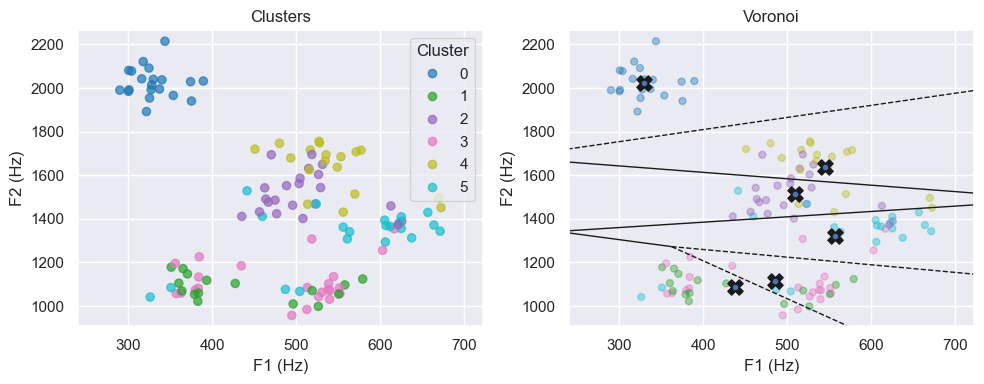

In [24]:
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# Setup
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
F1, F2 = X['F1'], X['F2']
xlim, ylim = (F1.min()-50, F1.max()+50), (F2.min()-50, F2.max()+50)
centroids = kmeans_q16.cluster_centers_[:, [X.columns.get_loc('F1'), X.columns.get_loc('F2')]]

# Left: cluster scatter
sc = ax1.scatter(F1, F2, c=y_kmeans_q16, cmap='tab10', alpha=0.7, s=35)
ax1.set(xlabel='F1 (Hz)', ylabel='F2 (Hz)', title='Clusters', xlim=xlim, ylim=ylim)
ax1.legend(*sc.legend_elements(), title="Cluster", loc="upper right")

# Right: Voronoi
voronoi_plot_2d(Voronoi(centroids), ax=ax2, show_vertices=False)
ax2.scatter(F1, F2, c=y_kmeans_q16, cmap='tab10', alpha=0.4, s=25)
ax2.scatter(centroids[:, 0], centroids[:, 1], c='k', s=120, marker='X')
ax2.set(xlabel='F1 (Hz)', ylabel='F2 (Hz)', title='Voronoi', xlim=xlim, ylim=ylim)

plt.tight_layout()
plt.show()


These plots should be legible, as discussed for Homework 5.

## Question 18 (2 points)

For the purposes of this homework, suppose that possible values of $k$ are 3--15.  The vast majority of human languages have a number of vowel categories in this range.

To determine the best value of $k$, we perform Silhouette analysis.  First, write code resulting in a dictionary `silhouette_scores` such that:

* `silhouette_scores[3]` is the mean Silhouette coefficient across all observations for the $k$-means clustering with $k = 3$
* `silhouette_scores[4]` is the same for $k=4$
* etc.

In [25]:
# Question
# Make sure to use the arguments `n_init = 10` and `random_state = 42` for clustering

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = {}
for k in range(3, 16):  # from 3 to 15 inclusive
    
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    
    # Calculate the mean silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores[k] = silhouette_avg

print(silhouette_scores)

{3: 0.3727077659683769, 4: 0.333266504720069, 5: 0.32137602309666763, 6: 0.30445427290954025, 7: 0.31307091256639946, 8: 0.3224371666709743, 9: 0.29956315786022797, 10: 0.2928349984292228, 11: 0.3135190238548203, 12: 0.2961450064067156, 13: 0.31940576486353034, 14: 0.28736345502468713, 15: 0.3002068632565605}


## Question 19 (2 points)

Run the following code, which should generate a figure showing the Silhouette coefficient ($y$-axis) as a function of $k$ ($x$-axis):

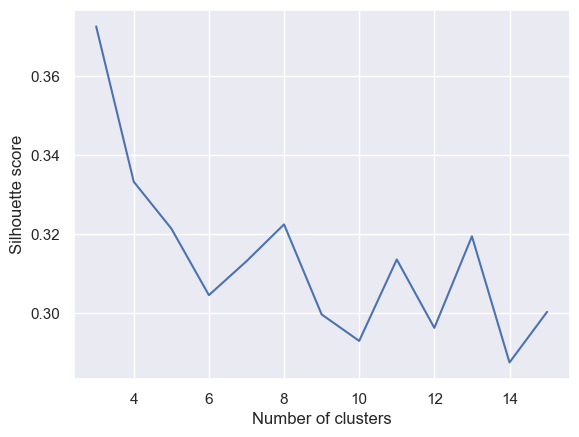

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x = list(silhouette_scores.keys()), y = list(silhouette_scores.values()))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

**Question:** What value of $k$ would you choose based on Silhouette analysis?  Briefly justify.

**A19: While $k=3$ is appealing with the highest silhouette score, it seems to be an oversimplifications of the limited data. For a safe margin, the next highest value of $k = 8$ is a more promising choice**




## Question 20 (2 points)

Perform $k$-means clustering using the value of $k$ from Q19. Save the result as `kmeans_q20`, and make a vector `y_kmeans_q20` of the category labels predicted by this clustering.

In [27]:
# Question
# Make sure to use the arguments `n_init = 10` and `random_state = 42` for clustering
from sklearn.cluster import KMeans

k_q19 = 8

# Perform k-means clustering
kmeans_q20 = KMeans(n_clusters=k_q19, n_init=10, random_state=42)
kmeans_q20.fit(X)

y_kmeans_q20 = kmeans_q20.labels_

print(y_kmeans_q20)

[4 4 2 3 1 1 2 4 2 3 1 1 2 4 7 3 1 1 2 4 2 3 1 1 2 4 7 3 6 6 2 4 7 3 1 6 0
 0 0 3 5 5 0 0 0 3 5 1 2 4 0 3 6 6 1 1 2 3 5 5 4 4 7 3 6 6 7 4 7 3 6 6 2 2
 7 3 5 5 7 4 7 3 6 1 2 4 7 3 1 6 7 4 7 3 1 1 7 4 7 3 1 5 4 4 7 3 1 5 2 2 0
 3 5 5 2 2 0 3 5 5]


## Question 21 (3 points)

Make a 1x2 array of F1/F2 plots like in Q17, but now using `kmeans_q20` and  `y_kmeans_q20`.

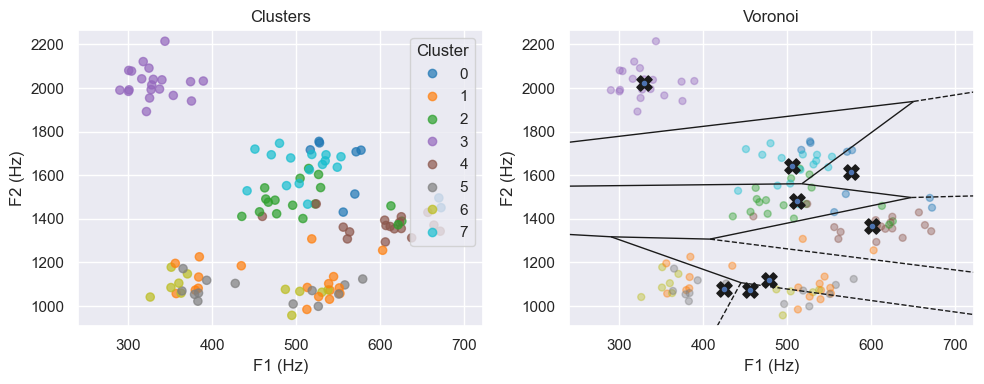

In [28]:
# Question
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# Setup
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
F1, F2 = X['F1'], X['F2']
xlim, ylim = (F1.min()-50, F1.max()+50), (F2.min()-50, F2.max()+50)
centroids = kmeans_q20.cluster_centers_[:, [X.columns.get_loc('F1'), X.columns.get_loc('F2')]]

# Left: cluster scatter
sc = ax1.scatter(F1, F2, c=y_kmeans_q20, cmap='tab10', alpha=0.7, s=35)
ax1.set(xlabel='F1 (Hz)', ylabel='F2 (Hz)', title='Clusters', xlim=xlim, ylim=ylim)
ax1.legend(*sc.legend_elements(), title="Cluster", loc="upper right")

# Right: Voronoi
voronoi_plot_2d(Voronoi(centroids), ax=ax2, show_vertices=False)
ax2.scatter(F1, F2, c=y_kmeans_q20, cmap='tab10', alpha=0.4, s=25)
ax2.scatter(centroids[:, 0], centroids[:, 1], c='k', s=120, marker='X')
ax2.set(xlabel='F1 (Hz)', ylabel='F2 (Hz)', title='Voronoi', xlim=xlim, ylim=ylim)

plt.tight_layout()
plt.show()


plt.show()

# Section 9

We now try GMM clustering.

## Question 22 (2 points)

We will do GMM clustering for the same range of $k$ as above (3--15), and choose the one with the best BIC.

First: write a function `gmm_k_bic` that takes as inputs:

* `X`: a feature matrix where each column is one feature (like our `X`)
* `k`: the number of components of the GMM

and does the following:

* Fit a GMM with **tied covariance matrix** to `X`
* Return the BIC value for this GMM

In [29]:
# Question
# Make sure to use the arguments `n_init = 10` and `random_state = 42` for clustering
from sklearn.mixture import GaussianMixture

def gmm_k_bic(X, k):
    # Initialize and fit the GMM with tied covariance
    gmm = GaussianMixture(n_components=k, covariance_type='tied', random_state=42, n_init=10)
    
    gmm.fit(X)
    return gmm.bic(X)


## Question 23 (2 points)

Write code resulting in a dictionary `gmm_scores` such that:

* `gmm_scores[3]` is the BIC value for the GMM fit to `X` with $k = 3$
* etc.

In [30]:
# Question
gmm_scores = {}
for k in range(3, 16):
    gmm_scores[k] = gmm_k_bic(X, k)

print(gmm_scores)

{3: 7393.812710407596, 4: 7342.71635559749, 5: 7306.534352028501, 6: 7263.468209803987, 7: 7282.390461983064, 8: 7287.2325561269945, 9: 7302.93585871747, 10: 7295.131029783482, 11: 7312.3224977213495, 12: 7326.606623874315, 13: 7345.584366121286, 14: 7357.9366876333315, 15: 7376.939656443148}


## Question 24 (2 points)

Run the following code, which should generate a figure showing the BIC ($y$-axis) as a function of $k$ ($x$-axis):

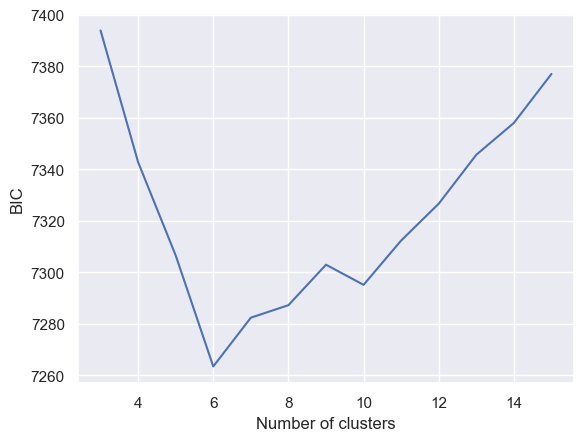

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x = list(gmm_scores.keys()), y = list(gmm_scores.values()))
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.show()

**Question:** What value of $k$ would you choose based on this plot?  Briefly justify.  

*Hint*: make sure you are considering the right direction for BIC, which is sometimes defined so higher = better and sometimes so lower = better.

**A24: I would choose $k=6$ because it clearly shows the minimum BIC value, indicating the optimal balance between model fit and complexity for the vowel categories in the mystery language.**



## Question 25 (2 points)

* Fit a GMM with **tied covariance matrix** using the value of $k$ from Q24 and save the result as `gmm_q25`.
* Make a vector `y_gmm_q25` of the category labels predicted by this clustering.

In [32]:
# Question
# Make sure to use the arguments `n_init = 10` and `random_state = 42` for clustering
from sklearn.mixture import GaussianMixture

k_q24 = 6
gmm_q25 = GaussianMixture(n_components=k_q24, covariance_type='tied', random_state=42, n_init=10)

gmm_q25.fit(X)
y_gmm_q25 = gmm_q25.predict(X)

print(y_gmm_q25)

[0 0 5 1 3 4 2 0 5 1 3 4 2 0 5 1 3 4 2 0 5 1 3 4 2 0 5 1 3 4 2 0 5 1 3 4 2
 0 5 1 3 4 2 0 5 1 3 4 2 0 5 1 3 4 2 0 5 1 3 4 2 0 5 1 3 4 2 0 5 1 3 4 2 0
 5 1 3 4 2 0 5 1 3 4 2 0 5 1 3 4 2 0 5 1 3 4 2 0 5 1 3 4 2 0 5 1 3 4 2 0 5
 1 3 4 2 0 5 1 3 4]


## Question 26 (2 points + 4 points extra credit) 

Make a 1x2 array of F1/F2 plots, such that:

* The left plot shows each point colored by its value of `y_gmm_q25` (the predicted category label), like Q17 and Q21 (2 points)
* The right plot shows one 95% confidence ellipse for each category. (4 points extra credit)

While there is code you can adapt for this in the Classification CoLab, it may contain a bug you have to figure out how to fix. 

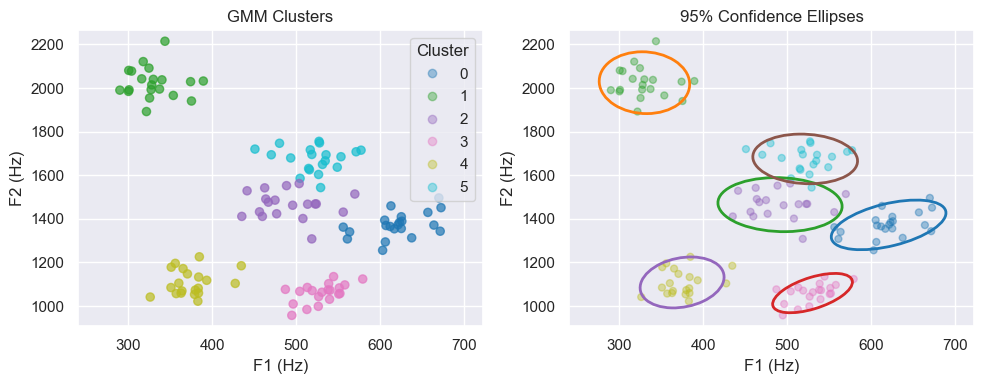

In [33]:
# Question
import matplotlib.pyplot as plt, numpy as np
from matplotlib.patches import Ellipse

def conf_ellipse(x, y, ax, n_std=2.0, **kw):
    cov = np.cov(np.asarray(x), np.asarray(y))
    eigvals, eigvecs = np.linalg.eigh(cov)
    idx = eigvals.argsort()[::-1]
    width, height = 2 * n_std * np.sqrt(eigvals[idx])
    angle = np.degrees(np.arctan2(*eigvecs[:, idx[0]][::-1]))
    return ax.add_patch(Ellipse([np.mean(x), np.mean(y)], width, height, angle=angle, **kw))

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
F1, F2 = X['F1'], X['F2']
bounds = {'xlim': (F1.min()-50, F1.max()+50), 'ylim': (F2.min()-50, F2.max()+50), 
          'xlabel': 'F1 (Hz)', 'ylabel': 'F2 (Hz)'}

for i, (ax, title) in enumerate(zip(axes, ['GMM Clusters', '95% Confidence Ellipses'])):
    sc = ax.scatter(F1, F2, c=y_gmm_q25, cmap='tab10', alpha=0.7 if i==0 else 0.4, s=35 if i==0 else 25)
    ax.set(title=title, **bounds)
    
axes[0].legend(*sc.legend_elements(), title="Cluster", loc="upper right")

[conf_ellipse(F1[m], F2[m], axes[1], 2.0, edgecolor=plt.cm.tab10(i%10/10), facecolor='none', linewidth=2) 
 for i, m in [(i, y_gmm_q25==c) for i, c in enumerate(np.unique(y_gmm_q25))] if np.sum(m) > 2]

plt.tight_layout()
plt.show()

## Question 27 (3 points)

A common situation in unsupervised learning is different methods giving different results, and the analyst has to decide which is most plausible using domain knowledge. There is no quantitative criterion for this because $y$ is not known.

Compare the clusterings chosen using $k$-means and GMM clustering:

* The $k$ values from Q19 and Q24
* The plots in Q21 and Q26

Which clustering is more plausible? Justify your answer.

**A27: The GMM clustering with k=6 is more plausible because vowel categories in natural languages typically form elliptical distributions in F1/F2 space, which the confidence ellipses capture well, rather than the rigid linear boundaries of k-means. Additionally, six vowel categories is a more common inventory size across languages than eight, and the GMM clusters show clearer, more phonetically natural separation between vowel groups.**

# To Submit

To submit:
* Name this notebook `YOUR_STUDENT_ID_Assignment_6.ipynb` and download it.
* Convert this `.ipynb` file to a `.pdf` (e.g., using the following instructions).  
* Upload the PDF to the Gradescope assignment "Assignment 6".
   * **<font color='red'>Make sure to match your answers to page numbers when submitting the PDF on Gradescope. Failure to do so will result in UP TO 10 POINTS BEING DEDUCTED.</font>**  
* Submit the `.ipynb` file on myCourses under Assignment 6.

(Note: `Print > Save as PDF` **will not work** because it will not display your figures correctly.)

You can convert the notebook to a PDF using the following instructions.

## Converting this notebook to a PDF

1. Make sure you have renamed the notebook, e.g. `000000000_Assignment_6.ipynb` where `000000000` is your student ID.
2. Make sure to save the notebook (`ctrl/cmd + s`).

Make sure Google Drive is mounted (it likely already is from the first question).

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
!ls "/content/drive/My Drive/Colab Notebooks/"

3. Install packages for converting .ipynb to .pdf

In [ ]:
import subprocess

def install_if_missing(packages):
    for pkg in packages:
        try:
            subprocess.run(['dpkg', '-s', pkg], check=True, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
            print(f"✅ {pkg} is already installed.")
        except subprocess.CalledProcessError:
            print(f"⬇️ Installing {pkg}...")
            subprocess.run(['apt-get', 'install', '-y', pkg], check=True)

!apt-get -qq update
packages_to_check = ['texlive-xetex', 'texlive-fonts-recommended', 'texlive-plain-generic', 'pandoc']
install_if_missing(packages_to_check)


4. Convert to PDF (replace `000000000` with your student ID)

In [ ]:
%env STUDENT_ID=260976059
!jupyter nbconvert --to pdf "/content/drive/My Drive/Colab Notebooks/${STUDENT_ID}_Assignment_6.ipynb"

5. Download the resulting PDF file. If you are using Chrome, you can do so by running the following code. On other browsers, you can download the PDF using the file mananger on the left of the screen (Navigate to the file > Right Click > Download).

In [ ]:
import os
from google.colab import files
files.download(f"/content/drive/My Drive/Colab Notebooks/{os.environ['STUDENT_ID']}_Assignment_6.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

6. Verify that your PDF correctly displays your figures and responses.

7. **<font color='red'>Remember to match your answers to page numbers when submitting the PDF on Gradescope!</font>**